In [1]:
# https://debuggercafe.com/deep-learning-with-pytorch-image-classification-using-neural-networks/

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [3]:
# define constants
NUM_EPOCHS = 10
BATCH_SIZE = 4
LEARNING_RATE = 0.001

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [5]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, 
                                             transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, 
                                            transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                          shuffle=True)

In [6]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal',
           'Shirt','Sneaker','Bag','Ankle Boot')

torch.Size([4, 1, 28, 28])
torch.Size([4])


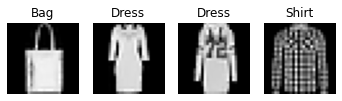

In [7]:
for batch_1 in trainloader:
    batch = batch_1
    break
print(batch[0].shape) # as batch[0] contains the image pixels -> tensors
print(batch[1].shape) # batch[1] contains the labels -> tensors
plt.figure(figsize=(12, 8))
for i in range (batch[0].shape[0]):
    plt.subplot(4, 8, i+1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(28, 28), cmap='gray')
    plt.title(classes[batch[1][i]])
    plt.savefig('fashion_mnist.png')
plt.show()

In [8]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, 
                               kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, 
                               kernel_size=5)
        self.fc1 = nn.Linear(in_features=256, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [9]:
# loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [10]:
# if GPU is available, then use GPU, else use CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device)

cpu


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [11]:
# function to calculate accuracy
def calc_acc(loader):
    correct = 0
    total = 0
    for data in loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    return ((100*correct)/total)

In [12]:
def train():
    epoch_loss = []
    train_acc = []
    test_acc = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            # set parameter gradients to zero
            optimizer.zero_grad()
            # forward pass
            outputs = net(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss.append(running_loss/15000)
        train_acc.append(calc_acc(trainloader))
        test_acc.append(calc_acc(testloader))
        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'
              % (epoch+1, NUM_EPOCHS, train_acc[epoch], test_acc[epoch], running_loss/15000))
        
    return epoch_loss, train_acc, test_acc

In [13]:
start = time.time()
epoch_loss, train_acc, test_acc = train()
end = time.time()
print('%0.2f minutes' %((end - start) / 60))

Epoch: 1 of 10, Train Acc: 85.318, Test Acc: 83.910, Loss: 0.611
Epoch: 2 of 10, Train Acc: 88.130, Test Acc: 87.070, Loss: 0.361
Epoch: 3 of 10, Train Acc: 88.017, Test Acc: 86.520, Loss: 0.314
Epoch: 4 of 10, Train Acc: 90.343, Test Acc: 88.760, Loss: 0.285
Epoch: 5 of 10, Train Acc: 90.960, Test Acc: 88.880, Loss: 0.267
Epoch: 6 of 10, Train Acc: 90.503, Test Acc: 88.780, Loss: 0.254
Epoch: 7 of 10, Train Acc: 91.652, Test Acc: 89.310, Loss: 0.241
Epoch: 8 of 10, Train Acc: 92.532, Test Acc: 89.530, Loss: 0.230
Epoch: 9 of 10, Train Acc: 91.958, Test Acc: 89.370, Loss: 0.220
Epoch: 10 of 10, Train Acc: 93.383, Test Acc: 90.050, Loss: 0.213
9.17 minutes


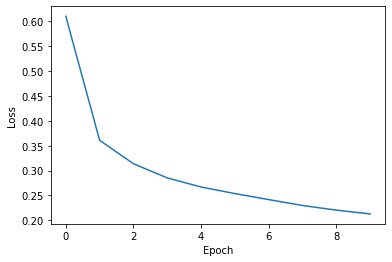

In [14]:
plt.figure()
plt.plot(epoch_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.savefig('fashion_loss.png')
plt.show()

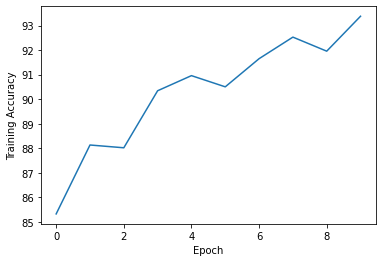

In [15]:
plt.figure()
plt.plot(train_acc)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
#plt.savefig('fashion_train_acc.png')
plt.show()

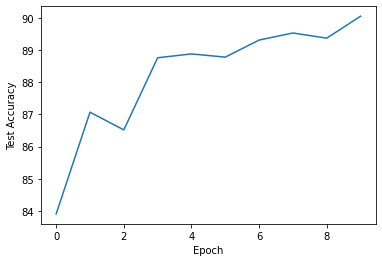

In [16]:
plt.figure()
plt.plot(test_acc)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
#plt.savefig('fashion_test_acc.png')
plt.show()